Here I load multiple multivariate timeseries regression datasets

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change. But blacklist large modules
%load_ext autoreload
%autoreload 2
%aimport -pandas
%aimport -torch
%aimport -numpy
%aimport -matplotlib
%aimport -dask
%aimport -tqdm
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 3.0)
plt.style.use('ggplot')

import holoviews as hv
from holoviews.operation.datashader import datashade, dynspread

In [3]:
from seq2seq_time.data import ucimlr_regression

In [4]:
root = '../data/processed/'

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
Time (s),,,,,,,,,,,,,,,,,,,,
2016-09-30 22:19:40.578,-1.734310,0.437913,1.108828,0.409225,-0.003454,1.824243,-0.650012,-0.646344,-0.795835,-1.430269,-1.339712,-1.197026,-1.312646,-1.630336,-1.596824,-1.620911,-1.672712,-1.660328,-1.650194,-1.648545
2016-09-30 22:19:40.886,-1.728497,0.437913,1.108828,0.409225,-0.032321,1.824243,-0.649951,-0.646284,-0.795761,-1.430190,-1.339655,-1.196981,-1.312590,-1.630324,-1.596824,-1.620899,-1.672712,-1.660315,-1.650173,-1.648539
2016-09-30 22:19:41.195,-1.722665,0.437913,1.108828,0.409225,-0.061189,1.827306,-0.649899,-0.646231,-0.795694,-1.430129,-1.339598,-1.196947,-1.312531,-1.630305,-1.596817,-1.620893,-1.672712,-1.660309,-1.650166,-1.648539
2016-09-30 22:19:41.505,-1.716814,0.437913,1.108828,0.409225,-0.027986,1.824583,-0.649847,-0.646182,-0.795634,-1.430062,-1.339541,-1.196917,-1.312486,-1.630299,-1.596817,-1.620893,-1.672712,-1.660289,-1.650152,-1.648528
2016-09-30 22:19:41.814,-1.710981,0.437913,1.108828,0.409225,0.010044,1.822541,-0.649799,-0.646133,-0.795581,-1.430013,-1.339492,-1.196879,-1.312442,-1.630292,-1.596824,-1.620881,-1.672712,-1.660309,-1.650152,-1.648528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-30 22:22:42.654,1.702303,-2.294832,4.023714,0.409225,-0.218337,1.824243,-0.649691,-0.646004,-0.795454,-1.429860,-1.339370,-1.196777,-1.315012,-1.630254,-1.596809,-1.620881,-1.672718,-1.660270,-1.654088,-1.651725
2016-09-30 22:22:42.960,1.708078,-2.294832,4.023714,0.409225,-0.259323,1.824243,-0.648385,-0.638213,-0.777433,-1.406889,-1.315353,-1.168923,-1.270079,-1.618053,-1.578022,-1.598259,-1.631450,-1.575014,-1.514371,-1.526583
2016-09-30 22:22:43.263,1.713797,-2.294832,4.088219,0.409225,-0.288881,-0.510275,-0.589259,-0.509705,-0.555600,-1.132191,-1.074530,-0.900785,-0.940728,-1.213296,-1.109063,-1.151742,-1.048204,-0.753188,-0.562590,-0.690625


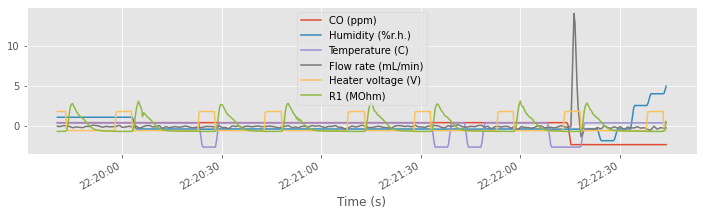

In [6]:
from ucimlr.regression_datasets import RegressionDataset, download_unzip, split_normalize_sequence, TRAIN
import os
from pathlib import Path

class GasSensor(RegressionDataset):
    """
    # Parameters
    root (str): Local path for storing/reading dataset files.
    split (str): One of {'train', 'validation', 'test'}
    validation_size (float): How large fraction in (0, 1) of the training partition to use for validation.
    
    http://archive.ics.uci.edu/ml/datasets/Gas+sensor+array+temperature+modulation
    """
    def __init__(self, root, split=TRAIN, validation_size=0.2):
        dataset_path = os.path.join(root, self.name)
        url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00487/gas-sensor-array-temperature-modulation.zip'
        download_unzip(url, dataset_path)
        files = sorted(Path(root, 'GasSensor').glob('*.csv'))
        dfs = []
        for f in files:
            now = pd.to_datetime(f.stem, format='%Y%m%d_%H%M%S')
            df = pd.read_csv(f)
            df.index = pd.to_timedelta(df['Time (s)'], unit='s') + now
            dfs.append(df)
        self.df = df = pd.concat(dfs)
        
        
#         df.drop(columns=['url', ' timedelta'], inplace=True)
#         y_columns = [' shares']
#         df[y_columns[0]] = np.log(df[y_columns[0]])
#         self.x, self. y = split_normalize_sequence(df, y_columns, validation_size, split, self.type_)
        
dataset = GasSensor(root)
dataset.df

df = dataset.df[20000:20600]
cols = ['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R1 (MOhm)', ]
df2 = df - df.mean()
df2 = df2 / df2.std()
df2[cols].plot()
df2

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
date_time,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
2018-09-30 20:00:00,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
2018-09-30 21:00:00,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159


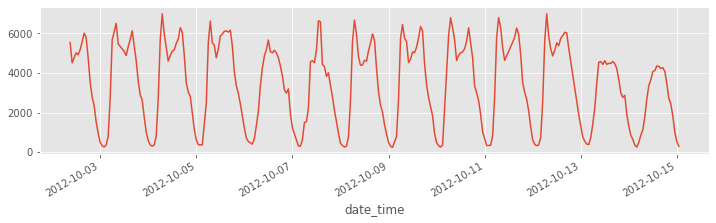

In [7]:
from ucimlr.helpers import download_file
# https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz'
filename = url.split('/')[-1]
download_file(url, root, filename)

df = pd.read_csv(root +'/' +filename)
df.index = pd.to_datetime(df.date_time)
df[:300].traffic_volume.plot()
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


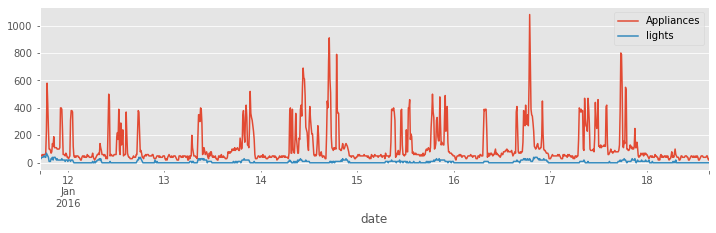

In [8]:
from ucimlr.helpers import download_file
# https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
filename = url.split('/')[-1]
download_file(url, root, filename)

df = pd.read_csv(root +'/' +filename)
df.index = pd.to_datetime(df.date)
# df[:300].traffic_volume.plot()
df[['Appliances', 'lights']].head(1000).plot()
df

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
2010-01-01 00:00:00+08:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00+08:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00+08:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00+08:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00+08:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00+08:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00+08:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00+08:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
2014-12-31 22:00:00+08:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


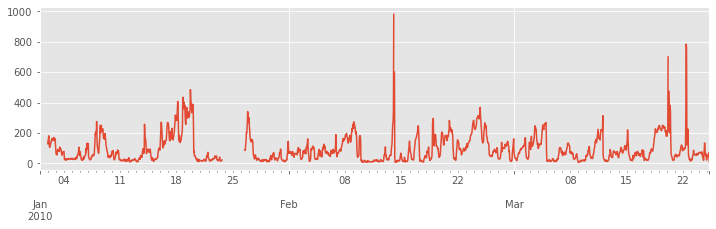

In [9]:
from ucimlr.helpers import download_file
# http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv'
filename = url.split('/')[-1]
download_file(url, root, filename)

df = pd.read_csv(root +'/' +filename)
df.index = pd.to_datetime(df[['year', 'month', 'day', 'hour']]).dt.tz_localize('Asia/Shanghai')
df = df[['pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir']]
df['pm2.5'][:2000].plot()
df

<AxesSubplot:xlabel='TIME'>

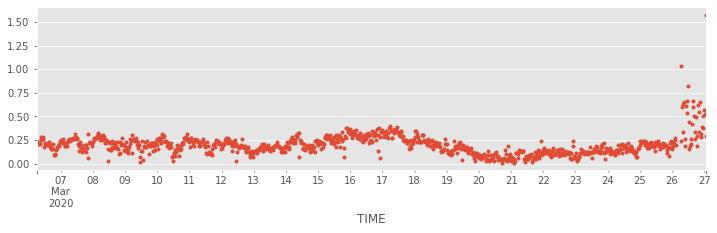

In [36]:
f = Path("../data/processed/currents/MOS_ANMN-WA_AETVZ_WATR20_FV01_WATR20-1909-Continental-194_currents.parquet")
df = pd.read_parquet(f)
df['SPD'] = np.sqrt(df.VCUR**2 + df.UCUR**2)
df.SPD[-1000:].plot(style='.')